# Importy

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta as tmd
from IPython.display import display
from importlib import reload

import APICommunication.config as cfg

import Data.DataLoader
reload(Data.DataLoader)
from Data.DataLoader import *

import Data.DataCleaner
reload(Data.DataCleaner)
from Data.DataCleaner import *

import MarkowitzAnalysis.ReturnAnalysis
reload(MarkowitzAnalysis.ReturnAnalysis)
from MarkowitzAnalysis.ReturnAnalysis import *

import PositionAnalysis.PortfolioPerformance
reload(PositionAnalysis.PortfolioPerformance)
from PositionAnalysis.PortfolioPerformance import *

import PositionAnalysis.PortfolioLoader
reload(PositionAnalysis.PortfolioLoader)
from PositionAnalysis.PortfolioLoader import *

import Plotting.Plotter
reload(Plotting.Plotter)
from Plotting.Plotter import *

import Plotting.EfficientFrontierPlot
reload(Plotting.EfficientFrontierPlot)
from Plotting.EfficientFrontierPlot import *

from warnings import filterwarnings
filterwarnings('ignore')

# Działanie właściwego programu

### Scenariusz 0. Aktualizacja danych do obecnej daty

In [6]:
start = '2025-01-25'

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start)

[INFO] Rozpoczynam pracę programu: 2025-01-31 08:35:02
	Pobieramy brakujące dane...
	Pozostało 100%.
		[1] Pobieram IU5C.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[2] Pobieram SYBL.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[3] Pobieram U3O8.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[4] Pobieram UETW.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[5] Pobieram XMME.UK.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[6] Pobieram SGAS.DE_9.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[7] Pobieram SUSM.UK.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[8] Pobieram PRFD.UK.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[9] Pobieram RIZJ.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[10] Pobieram IBZL.NL.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[1] Pobieram PR1E.DE.
		

### Scenariusz 1. Analiza obecnej pozycji przez łączenie z API

In [30]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

pl = PortfolioLoader('Pozycja od 10.12.2024 do 10.03.2025')

dataloader = DataLoader(cfg.user_id, cfg.pwd)
info = dataloader.loadInstrumentsInfo()

currentTrades = dataloader.getCurrentTrades(info, weights = pl.portfolio)
display(currentTrades.getSummary())
print(f"Zwrot z portfela: {currentTrades.getPCTReturn()}%")
print(f"Zysk z inwestycji: {currentTrades.getPLNReturn()} PLN")

[INFO] Rozpoczynam pracę programu: 2025-02-03 12:10:46
	[2025-02-03 12:10:46] Loguję do API...
	[2025-02-03 12:10:46] Wylogowuję z API...


,ESD.FR,FLXI.DE,4GLD.DE,P500.DE
CzasOtwarcia,2024-12-10 15:51:46,2024-12-10 15:51:14,2024-12-10 15:52:16,2024-12-10 15:50:41
CenaOtwarcia,24.307,43.55,82.2,1134.05
CenaAktualna,23.768,40.92,87.755,1146.85
Zwrot [%],-2.217468,-6.039036,6.757908,1.128698
KursWalutowyOtwarcia,4.077831,4.283745,4.283745,4.283745
KursWalutowyAktualny,4.108952,4.21084,4.21084,4.21084
ZwrotWalutowy [%],0.763171,-1.701896,-1.701896,-1.701896
CenaOtwarciaPLN,99.119842,186.557091,352.123831,4857.980908
CenaAktualnaPLN,97.661571,172.307573,369.522264,4829.201854
ZwrotPLN [%],-1.47122,-7.638154,4.940998,-0.592408


Zwrot z portfela: -2.84%
Zysk z inwestycji: -34.05 PLN


### Scenariusz 2. Wybór nowej pozycji

In [2]:
start, end = '2024-01-01', '2025-01-09'

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info)

freq = '8M'
returnRates = datacleaner.getReturnRates(freq)
mo = MarkowitzOptimization(returnRates, freq)
mo.getOptimalWeights(model='max_sharpe', risk_method='oas')
portfolio = mo.getPortfolio()
portfolio.getSummary()

[INFO] Rozpoczynam pracę programu: 2025-02-02 14:44:16
[INFO] Usuwanie instrumentów o wysokich kosztach obsługi.
	Aktualizacja danych...
	Pozostawiam 953 instrumentów.
[INFO] Usuwanie instrumentów o wysokich spreadach.
	Aktualizacja danych...
	Pozostawiam 952 instrumentów.
[INFO] Usuwanie instrumentów o dużych brakach w danych.
	Aktualizacja danych...
	Pozostawiam 907 instrumentów.
[INFO] Usuwanie instrumentów na podstawie ich zmienności.
	Aktualizacja danych...
	Pozostawiam 839 instrumentów.
[INFO] Załadowano 833 instrumentów.
Opis wygenerowany 2025-02-02 14:44:45.
Okres inwestycji: 8M.
Zastosowane kryterium wyboru: max_sharpe.
Metoda estymacji ryzyka: oas.
Poziom ufności: 0.95.
Oczekiwany zwrot z portfela [%]: 16.6769
Oczekiwane ryzyko portfela [%]: 1.1312
Przedział ufności dla stóp zwrotu [%]: [15.1336, 18.3474]
Sharpe Ratio portfela: 11.1926
Skład portfela:
	LIRU.DE:
		Waga w portfelu [%]: 16.924
		Oczekiwana stopa zwrotu [%]: 13.967
		Oczekiwana stopa ryzyka [%]: 2.9985
		Przedzia

In [3]:
portfolio.calculateRealPortfolio(1200)

Skład portfela przeliczony dla kwoty 1200 PLN:
	LIRU.DE: 203.09 PLN
	STZ.FR: 31.73 PLN
	XCS5.DE: 210.31 PLN
	EGLN.UK: 64.13 PLN
	QVMP.DE: 164.82 PLN
	4GLD.DE: 38.65 PLN
	IGLN.UK: 12.07 PLN
	BNK.FR_9: 45.17 PLN
	IU5C.DE: 107.05 PLN
	XUCD.DE: 40.32 PLN
	IS3R.DE: 47.02 PLN
	XNGI.DE: 235.61 PLN


### Scenariusz 3. Analiza konkretnego portfela

#### Wariant 1. Podajemy dane ręcznie

In [ ]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

portfolio = {'P500.DE': 32.56, 
             '4GLD.DE': 17.47, 
             'FLXI.DE': 45.06, 
             'ESD.FR': 4.91}
freq = '3M'

start, end = '2023-07-01', '2024-12-10'

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=list(portfolio.keys()))
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(freq)
pp = PortfolioPerformance(portfolio, returnRates, freq, 'empirical', 'max_utility',data=data)
pp.getSummary()

In [14]:
SaveDict(pp.getStatDict(), 'Pozycja od 10.12.2024 do 10.03.2025', 'Positions')

#### Wariant 2. Wygrywamy automatycznie zapisany portfel

In [31]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

start, end = '2024-01-01', '2025-01-13'
pl = PortfolioLoader('Pozycja od 10.12.2024 do 10.03.2025')
pl.getSummary()

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=pl.symbols)
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(pl.freq)

# pp = pl.getPortfolio(returnRates, data)

[INFO] Rozpoczynam pracę programu: 2025-02-03 12:11:08
Opis wygenerowany 2025-01-09 10:28:53.
Okres inwestycji: 3M.
Zastosowane kryterium wyboru: max_utility.
Metoda estymacji ryzyka: empirical.
Poziom ufności: 0.95.
Oczekiwany zwrot z portfela [%]: 4.2423
Oczekiwane ryzyko portfela [%]: 3.5583
Przedział ufności dla stóp zwrotu [%]: [-1.7619, 9.4338]
Sharpe Ratio portfela: 0.769
Skład portfela:
	P500.DE:
		Waga w portfelu [%]: 32.56
		Oczekiwana stopa zwrotu [%]: 4.4567
		Oczekiwana stopa ryzyka [%]: 5.1994
		Przedział ufności dla stóp zwrotu [%]: [-3.492, 13.0238]
	4GLD.DE:
		Waga w portfelu [%]: 17.47
		Oczekiwana stopa zwrotu [%]: 5.2931
		Oczekiwana stopa ryzyka [%]: 5.9754
		Przedział ufności dla stóp zwrotu [%]: [-3.5263, 15.3523]
	FLXI.DE:
		Waga w portfelu [%]: 45.06
		Oczekiwana stopa zwrotu [%]: 3.7429
		Oczekiwana stopa ryzyka [%]: 4.5506
		Przedział ufności dla stóp zwrotu [%]: [-2.2151, 11.8967]
	ESD.FR:
		Waga w portfelu [%]: 4.91
		Oczekiwana stopa zwrotu [%]: 3.6648
		O

### Scenariusz 4. Wykresy dla konkretnego portfela

[INFO] Rozpoczynam pracę programu: 2025-01-16 17:03:51

Opis wygenerowany 2025-01-09 10:28:53.
Okres inwestycji: 3M.
Zastosowane kryterium wyboru: max_utility.
Metoda estymacji ryzyka: empirical.
Poziom ufności: 0.95.
Oczekiwany zwrot z portfela [%]: 4.2423
Oczekiwane ryzyko portfela [%]: 3.5583
Przedział ufności dla stóp zwrotu [%]: [-1.7619, 9.4338]
Sharpe Ratio portfela: 0.769
Skład portfela:
	P500.DE:
		Waga w portfelu [%]: 32.56
		Oczekiwana stopa zwrotu [%]: 4.4567
		Oczekiwana stopa ryzyka [%]: 5.1994
		Przedział ufności dla stóp zwrotu [%]: [-3.492, 13.0238]
	4GLD.DE:
		Waga w portfelu [%]: 17.47
		Oczekiwana stopa zwrotu [%]: 5.2931
		Oczekiwana stopa ryzyka [%]: 5.9754
		Przedział ufności dla stóp zwrotu [%]: [-3.5263, 15.3523]
	FLXI.DE:
		Waga w portfelu [%]: 45.06
		Oczekiwana stopa zwrotu [%]: 3.7429
		Oczekiwana stopa ryzyka [%]: 4.5506
		Przedział ufności dla stóp zwrotu [%]: [-2.2151, 11.8967]
	ESD.FR:
		Waga w portfelu [%]: 4.91
		Oczekiwana stopa zwrotu [%]: 3.6648
		

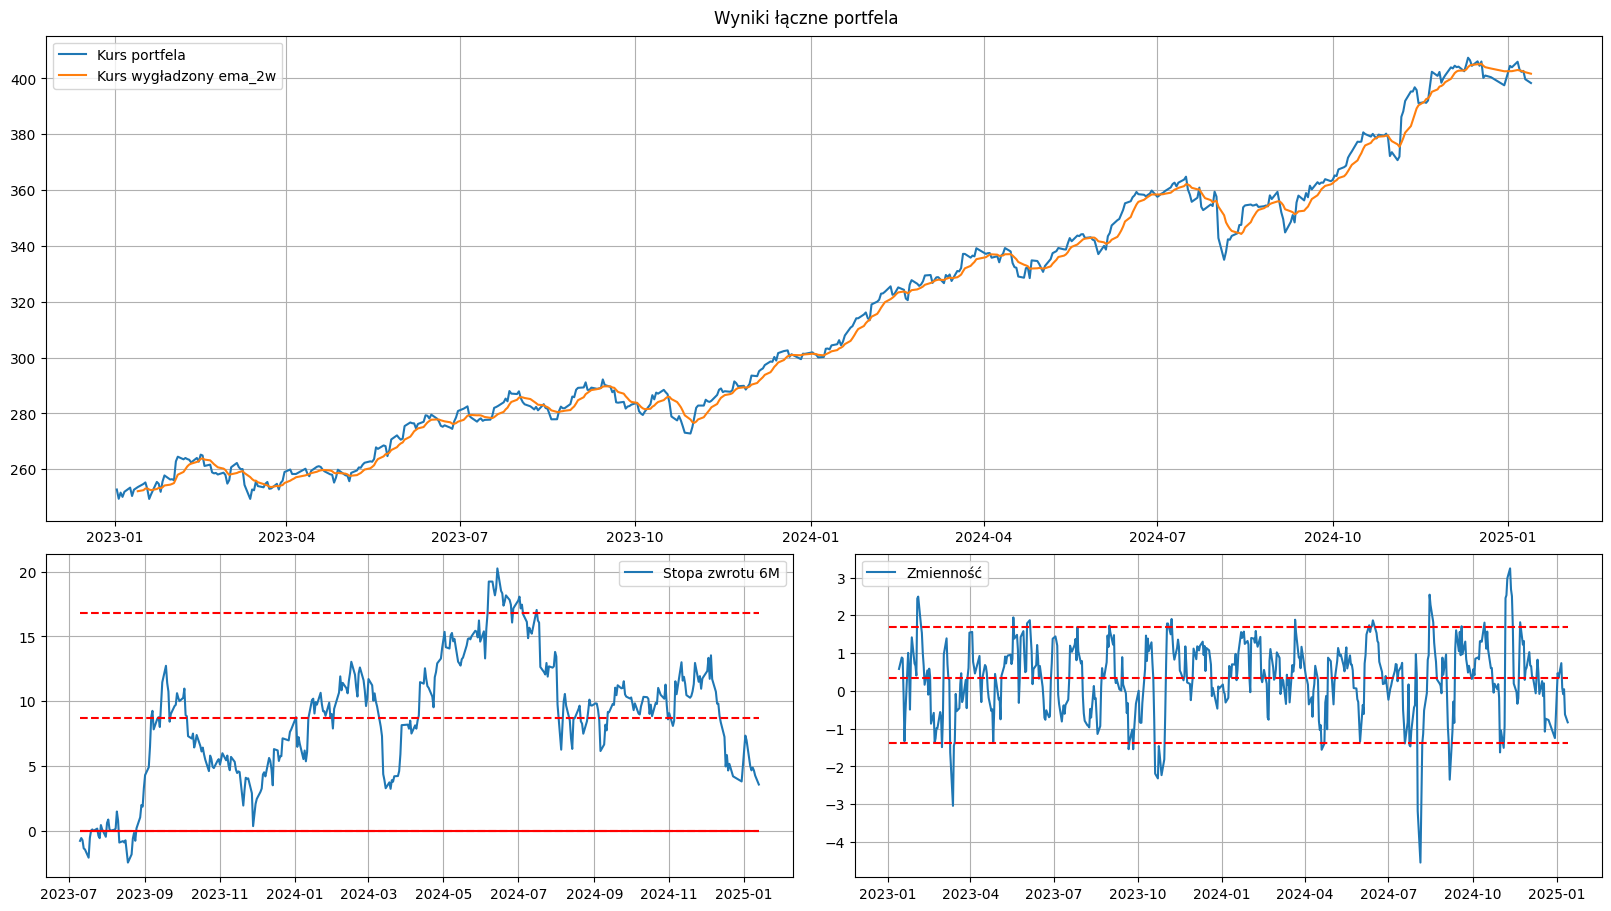

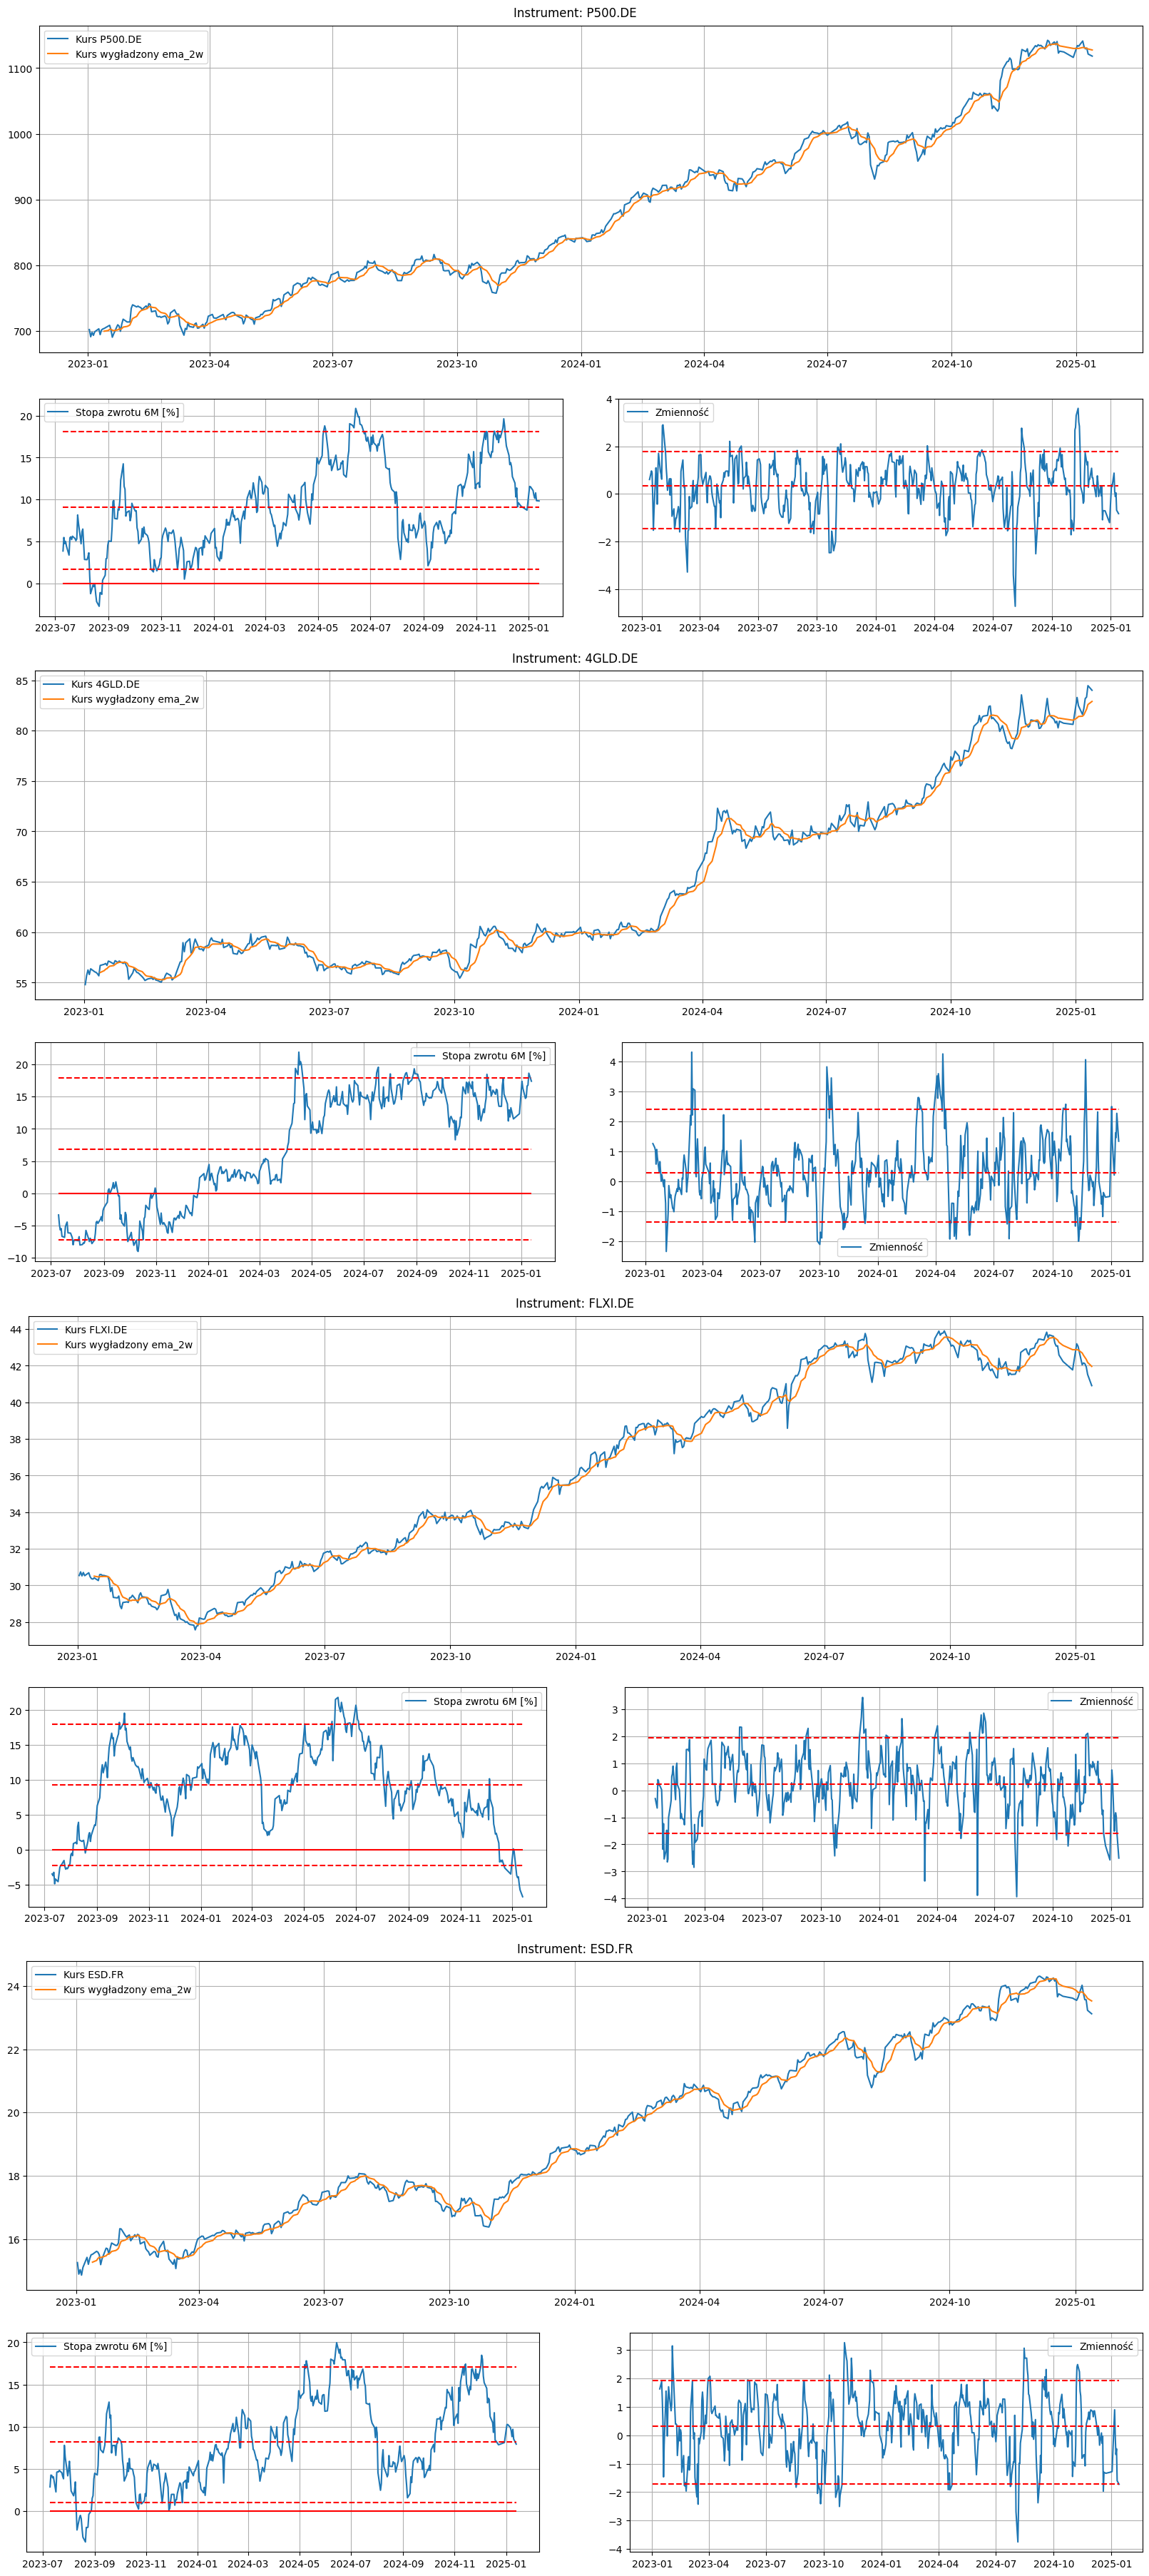

In [72]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

pl = PortfolioLoader('Pozycja od 10.12.2024 do 10.03.2025')
freq = '6M'
print()
pl.getSummary()
print()
start, end = '2023-01-01', '2025-01-13'
dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=pl.symbols)
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(freq)

plotter = Plotter(pl.portfolio,
                  data,
                  returnRates,
                  freq,
                  pl.model,
                  pl.risk_method,
                  compare='ema_2w')
plotter.plot(show_instruments=True)

### Scenariusz 5. Wykres "Efficient Frontier"

In [5]:
start, end = '2020-01-01', '2025-01-13'

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info)

[INFO] Rozpoczynam pracę programu: 2025-01-16 16:10:36
[INFO] Usuwanie instrumentów o wysokich kosztach obsługi.
	Aktualizacja danych...
	Pozostawiam 953 instrumentów.
[INFO] Usuwanie instrumentów o wysokich spreadach.
	Aktualizacja danych...
	Pozostawiam 294 instrumentów.
[INFO] Usuwanie instrumentów o dużych brakach w danych.
	Aktualizacja danych...
	Pozostawiam 264 instrumentów.
[INFO] Usuwanie instrumentów na podstawie ich zmienności.
	Aktualizacja danych...
	Pozostawiam 244 instrumentów.


In [6]:
freq = '1Y'
returnRates = datacleaner.getReturnRates(freq)
ef = EfficientFrontierPlot(returnRates, freq, Npoints=80)

[INFO] Przygotowuję dane do wykresu...
	Pozostało 100.0%
	Pozostało 87.5%
	Pozostało 75.0%
	Pozostało 62.5%
	Pozostało 50.0%
	Pozostało 37.5%
	Pozostało 25.0%
	Pozostało 12.5%
[INFO] Wyznaczamy portfel 'max_sharpe'...
[INFO] Wyznaczamy portfele 'max_utility'...


[INFO] Generuję 5000 portfeli losowych...
	Pozostało 100.0%
	Pozostało 90.0%
	Pozostało 80.0%
	Pozostało 70.0%
	Pozostało 60.0%
	Pozostało 50.0%
	Pozostało 40.0%
	Pozostało 30.0%
	Pozostało 20.0%
	Pozostało 10.0%
[INFO] Rysuję wykres...


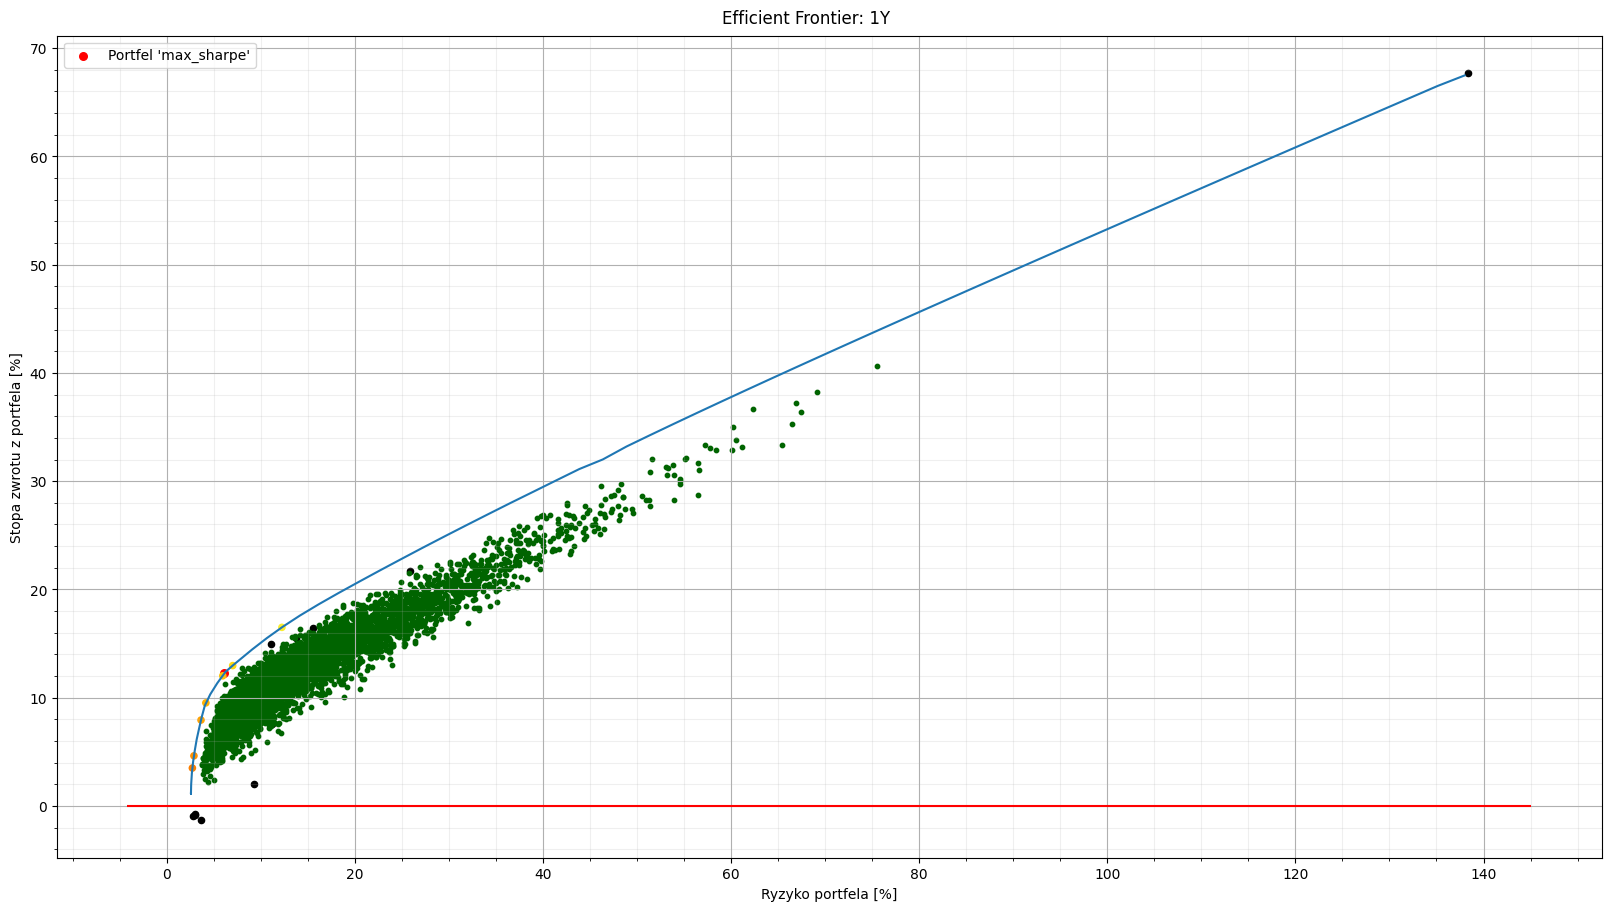

In [7]:
ef.plot(Nrandom=5000)

# Brudnopis

### Backtest - pierwsze kroki

In [33]:
# Input:
start, end = '2020-01-01', '2025-01-30'
freq = '3M'

dates = [x.strftime("%Y-%m-%d") for x in pd.date_range(start, end, freq=freq)]
len_train = 4 # to powinno być jakąś funkcją 'freq'
len_train += 1 # stopy zwrotu nie obliczają się dla pierwszego okresu treningowego

######################################################################
train = []
test = []
for i, x in enumerate(dates):
    
    if i+len_train+1 >= len(dates):
        break
    
    start_train = dates[i]
    end_train = dates[i+len_train]
    end_test = dates[i+len_train+1]
    
    train.append((start_train, end_train))
    test.append((end_train, end_test))

assert len(train) == len(test)

######################################################################
summary_dict = {}

for i in range(len(train)):
    
    # Okres treningowy
    start_train, end_train = train[i]
    
    # Okres testowy
    start_test, end_test = test[i]
    
    # Ładujemy całe dane na raz
    dataloader = DataLoader(cfg.user_id, cfg.pwd)
    
    print(f"[INFO] Okres {i+1} z {len(train)}. Pobieramy dane od {start_train} do {end_test}: {now(False)}")
    data = dataloader.loadInstrumentsData(start_train, end_test)
    info = dataloader.loadInstrumentsInfo()
    
    datacleaner = DataCleaner(data, info, verbose=False)
    returnRates = datacleaner.getReturnRates(freq)
    
    # Trening
    print(f"\t[INFO] Trening w okresie od {start_train} do {end_train}")

    train_indices = returnRates.index.isin(pd.date_range(start_train, end_train))
    mo = MarkowitzOptimization(returnRates.loc[train_indices, :], freq, verbose=False)
    mo.getOptimalWeights(model='max_sharpe', risk_method='oas')
    pp = mo.getPortfolio()
    expected_return = pp.portfoliomean
    conf_int = getQuantiles(pp.portfolioReturn, q=0.05)
    sharpe_ratio = pp.sharpe_ratio
    
    print(f"\tOczekiwany zwrot treningowy: {expected_return:.2%}")
    print(f"\tSharpe Ratio: {sharpe_ratio:.2f}")
    print()
    portfolio = pp.portfolio
    
    # Test
    print(f"\t[INFO] Test w okresie od {start_test} do {end_test}")

    test_indices = returnRates.index.isin(pd.date_range(start_train, end_train))
    pp = PortfolioPerformance(portfolio, returnRates.loc[test_indices, :], freq, 'empirical', 'max_utility')
    true_return = pp.portfolioReturn.iloc[-1]
    
    # if sharpe_ratio >= 1.0:
    #     if true_return < conf_int[0]: summary_dict['below'] += 1
    #     elif (true_return >= conf_int[0]) and (true_return < expected_return): summary_dict['lower_half'] += 1
    #     elif (true_return >= expected_return) and (true_return < conf_int[1]): summary_dict['upper_half'] += 1
    #     elif true_return > conf_int[1]: summary_dict['above'] += 1
    #     else: print('Jakiś idiotyczny błąd xd')
    
    print(f"\tRzeczywisty zwrot w okresie testowym: {true_return:.2%}")
    print(f"\tTreningowy przedział ufności: [{conf_int[0]:.2%}, {conf_int[1]:.2%}]")
    print()
    
    summary_dict[i+1] = {'expected_return': expected_return,
                       'true_return': true_return,
                       'conf_int_low': conf_int[0],
                       'conf_int_high': conf_int[1],
                       'sharpe_ratio': sharpe_ratio}

summary = pd.DataFrame(summary_dict).T
display(summary)

[INFO] Okres 1 z 14. Pobieramy dane od 2020-01-31 do 2021-07-31: 2025-02-03 12:12:43
	[INFO] Trening w okresie od 2020-01-31 do 2021-04-30
	Oczekiwany zwrot treningowy: 7.18%
	Sharpe Ratio: 2.83

	[INFO] Test w okresie od 2021-04-30 do 2021-07-31
	Rzeczywisty zwrot w okresie testowym: 6.12%
	Treningowy przedział ufności: [4.51%, 10.55%]

[INFO] Okres 2 z 14. Pobieramy dane od 2020-04-30 do 2021-10-31: 2025-02-03 12:13:05
	[INFO] Trening w okresie od 2020-04-30 do 2021-07-31
	Oczekiwany zwrot treningowy: 8.13%
	Sharpe Ratio: 3.77

	[INFO] Test w okresie od 2021-07-31 do 2021-10-31
	Rzeczywisty zwrot w okresie testowym: 7.34%
	Treningowy przedział ufności: [5.81%, 10.60%]

[INFO] Okres 3 z 14. Pobieramy dane od 2020-07-31 do 2022-01-31: 2025-02-03 12:13:26
	[INFO] Trening w okresie od 2020-07-31 do 2021-10-31
	Oczekiwany zwrot treningowy: 7.15%
	Sharpe Ratio: 3.87

	[INFO] Test w okresie od 2021-10-31 do 2022-01-31
	Rzeczywisty zwrot w okresie testowym: 4.97%
	Treningowy przedział ufnośc

,expected_return,true_return,conf_int_low,conf_int_high,sharpe_ratio
1,0.071843,0.061188,0.045063,0.105527,2.834965
2,0.081293,0.073377,0.058131,0.106035,3.772252
3,0.071505,0.049711,0.049367,0.096516,3.869246
4,0.073422,0.049009,0.046726,0.108742,3.082420
5,0.064893,0.100202,0.023329,0.107641,1.914096
6,0.069342,0.004998,0.006033,0.136857,1.374685
7,0.066640,0.077031,0.014802,0.110700,1.764518
8,0.057169,0.027849,0.008853,0.111610,1.328378
9,0.055274,0.004928,0.012936,0.115716,1.282620
10,0.052206,0.063097,0.000664,0.114288,1.127503


In [42]:
summary['in_conf_int'] = summary['true_return'].between(summary['conf_int_low'], summary['conf_int_high'])
# summary.insert(loc=2, column='error', value=(summary['true_return'] - summary['expected_return']))
summary

,expected_return,true_return,error,conf_int_low,conf_int_high,sharpe_ratio,in_conf_int
1,0.071843,0.061188,-0.010655,0.045063,0.105527,2.834965,True
2,0.081293,0.073377,-0.007916,0.058131,0.106035,3.772252,True
3,0.071505,0.049711,-0.021794,0.049367,0.096516,3.869246,True
4,0.073422,0.049009,-0.024413,0.046726,0.108742,3.082420,True
5,0.064893,0.100202,0.035309,0.023329,0.107641,1.914096,True
6,0.069342,0.004998,-0.064344,0.006033,0.136857,1.374685,False
7,0.066640,0.077031,0.010390,0.014802,0.110700,1.764518,True
8,0.057169,0.027849,-0.029320,0.008853,0.111610,1.328378,True
9,0.055274,0.004928,-0.050346,0.012936,0.115716,1.282620,False
10,0.052206,0.063097,0.010891,0.000664,0.114288,1.127503,True
